In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\KIRAN JEEVA\Downloads\python project datasets\netfix\netflix1.csv')

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df=df.replace('Not Given',np.nan)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      6202 non-null   object
 4   country       8503 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
df.rename(columns={'listed_in':'category'})

,show_id,type,title,director,country,date_added,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,NaN,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,NaN,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,NaN,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,NaN,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [9]:
ct=df.copy()

In [10]:
ct.dropna(subset='country',inplace=True)

In [11]:
ct.director.isnull().sum()

2588

In [57]:
ct_tb=ct.pivot_table(columns='type',index='country',aggfunc=np.count,fill_value=0,margins=True)

AttributeError: module 'numpy' has no attribute 'count'

In [73]:
tab=df.groupby('country')['type'].value_counts().unstack()
tab.fillna(0,inplace=True)
tab

type,Movie,TV Show
country,,
Argentina,56.0,20.0
Australia,61.0,53.0
Austria,8.0,1.0
Bangladesh,3.0,0.0
Belarus,0.0,1.0
...,...,...
Uruguay,8.0,1.0
Venezuela,2.0,0.0
Vietnam,7.0,0.0


In [75]:
tab['sum0']=tab['Movie']+tab['TV Show']
tab.sort_values(by='sum0',ascending=False,inplace=True)

In [76]:
tab

type,Movie,TV Show,sum0
country,,,
United States,2395.0,845.0,3240.0
India,976.0,81.0,1057.0
United Kingdom,387.0,251.0,638.0
Pakistan,71.0,350.0,421.0
Canada,187.0,84.0,271.0
...,...,...,...
Somalia,1.0,0.0,1.0
Slovenia,1.0,0.0,1.0
Cyprus,0.0,1.0,1.0


<AxesSubplot:xlabel='country'>

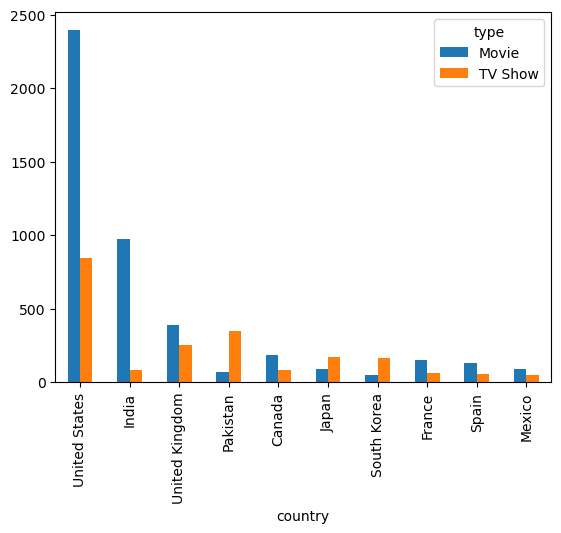

In [69]:
tab.loc[:,['Movie','TV Show']].head(10).plot(kind='bar')

In [88]:
df.duplicated().value_counts()

False    8790
dtype: int64

In [82]:
df['director'].value_counts()

Rajiv Chilaka                     20
Raúl Campos, Jan Suter            18
Alastair Fothergill               18
Marcus Raboy                      16
Suhas Kadav                       16
                                  ..
Matt D'Avella                      1
Parthiban                          1
Scott McAboy                       1
Raymie Muzquiz, Stu Livingston     1
Mozez Singh                        1
Name: director, Length: 4527, dtype: int64

In [85]:
df['rating'].unique().shape

(14,)

In [90]:
# difference in dates added and released

In [91]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [121]:
a=pd.to_datetime(df['date_added'])

In [138]:
a=pd.to_datetime(df['date_added']).apply(lambda x: x.year)
a

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8785    2017
8786    2018
8787    2016
8788    2018
8789    2018
Name: date_added, Length: 8790, dtype: int64

In [156]:
df,b

(     show_id     type                             title         director  \
 0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
 1         s3  TV Show                         Ganglands  Julien Leclercq   
 2         s6  TV Show                     Midnight Mass    Mike Flanagan   
 3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
 4         s8    Movie                           Sankofa     Haile Gerima   
 ...      ...      ...                               ...              ...   
 8785   s8797  TV Show                        Yunus Emre              NaN   
 8786   s8798  TV Show                         Zak Storm              NaN   
 8787   s8801  TV Show                Zindagi Gulzar Hai              NaN   
 8788   s8784  TV Show                              Yoko              NaN   
 8789   s8786  TV Show                               YOM              NaN   
 
             country  date_added  release_year rating   duration  \
 0    

In [161]:
b=a-df['release_year']
b[b<0]

3869   -1
5138   -1
5178   -3
6948   -1
6992   -1
7355   -1
7436   -1
7484   -1
7517   -1
7537   -1
7996   -1
7997   -1
8223   -2
8235   -1
dtype: int64

In [184]:
b

0        1
1        0
2        0
3        0
4       28
        ..
8785     1
8786     2
8787     4
8788     2
8789     2
Length: 8790, dtype: int64

In [186]:
bins=[-10,0,1,5,10,15,200]
grouped=pd.cut(b,bins,labels=['pre booked','very new','new','old','very old','very very old'])

In [201]:
b.value_counts()

 0     3239
 1     1584
 2      713
 3      489
 4      367
       ... 
 60       1
-3        1
 63       1
 93       1
-2        1
Length: 75, dtype: int64

In [204]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

<AxesSubplot:>

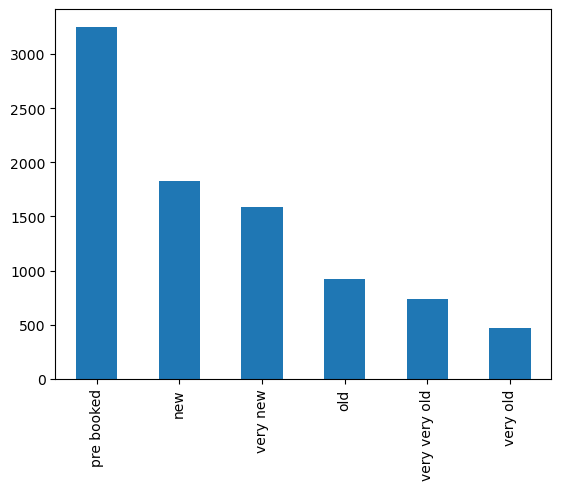

In [203]:
grouped.value_counts().plot(kind='bar')

In [219]:
d=df.groupby(['release_year','type']).size().unstack().fillna(0)
d

type,Movie,TV Show
release_year,,
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,1.0
...,...,...
2017,765.0,265.0
2018,767.0,379.0
2019,633.0,397.0


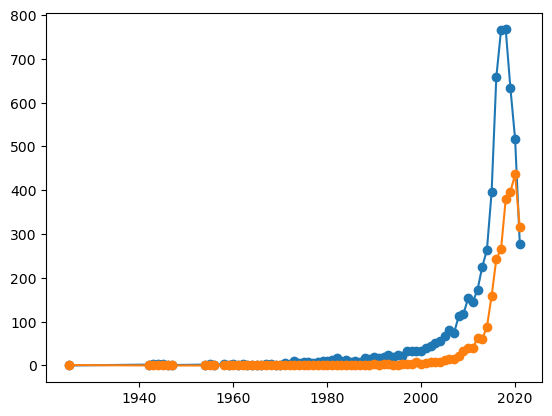

In [220]:
plt.plot(d,'-o')

<AxesSubplot:xlabel='release_year'>

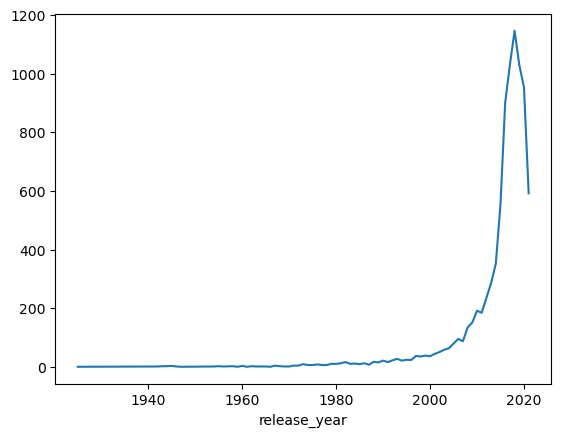

In [225]:
df.groupby('release_year')['type'].size().plot()

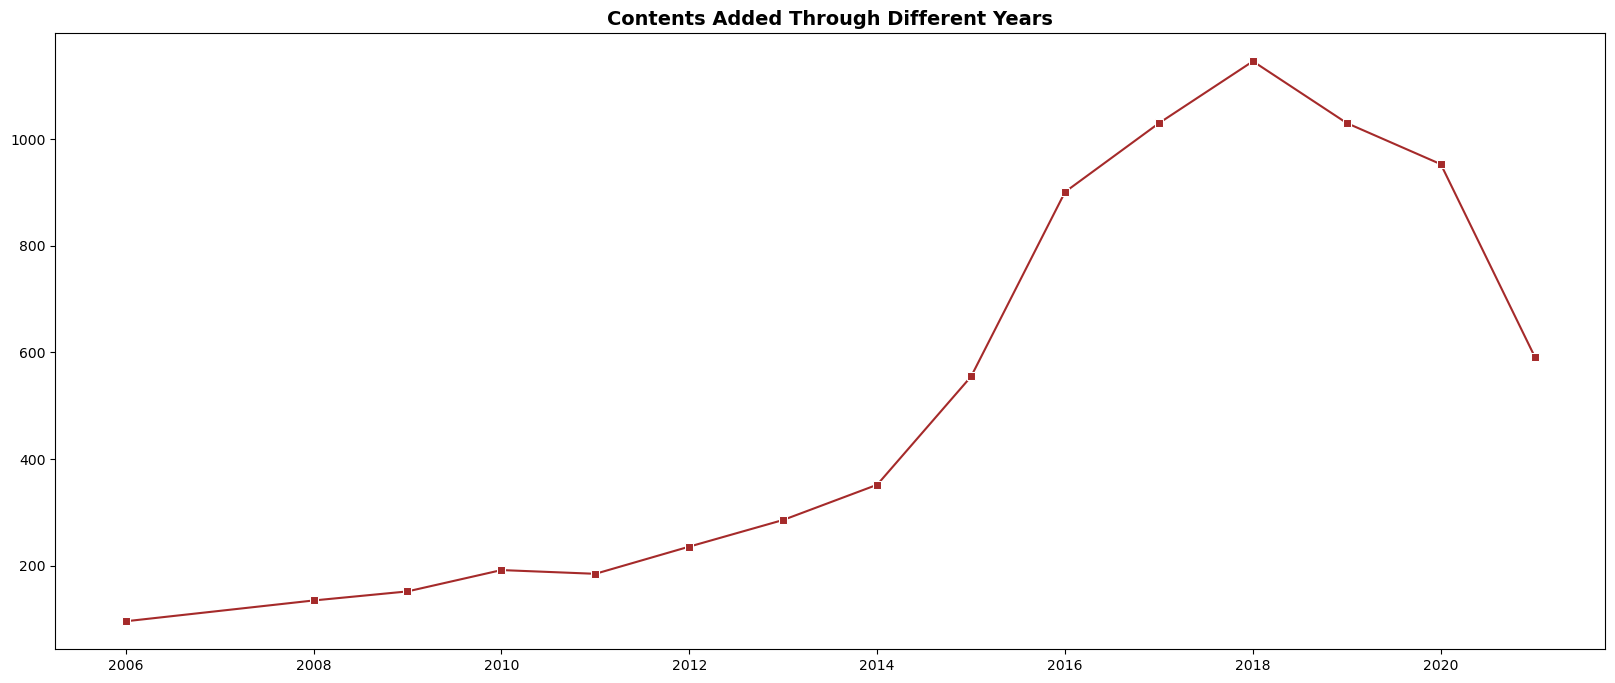

In [233]:
import seaborn as sns
plt.figure(figsize = (20,8))
sns.lineplot(x = df['release_year'].value_counts().head(15).index , y = df['release_year'].value_counts().head(15).values, alpha = 1, color = "brown", marker='s')
plt.title('Contents Added Through Different Years', fontsize = 14, fontweight = 'heavy')
plt.show()

<AxesSubplot:>

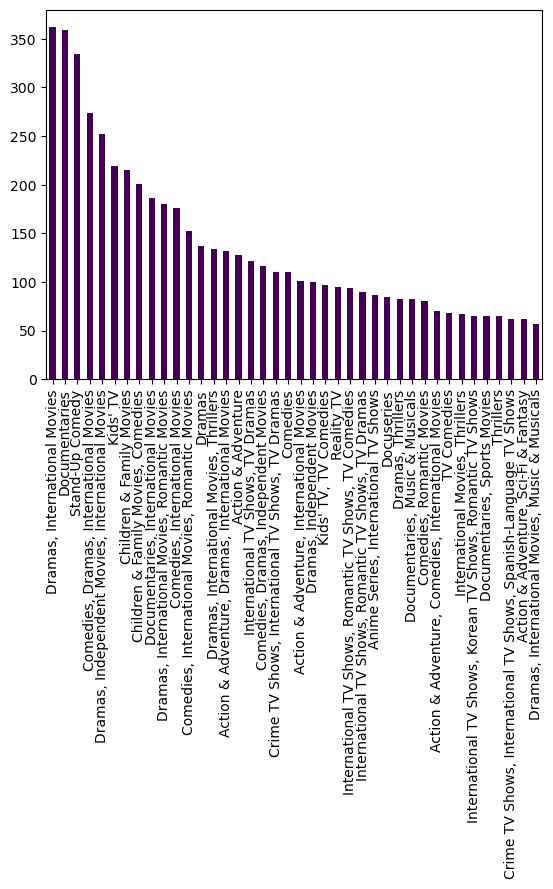

In [256]:
df['listed_in'].value_counts().head(40).plot(kind='bar',cmap='viridis')

<AxesSubplot:>

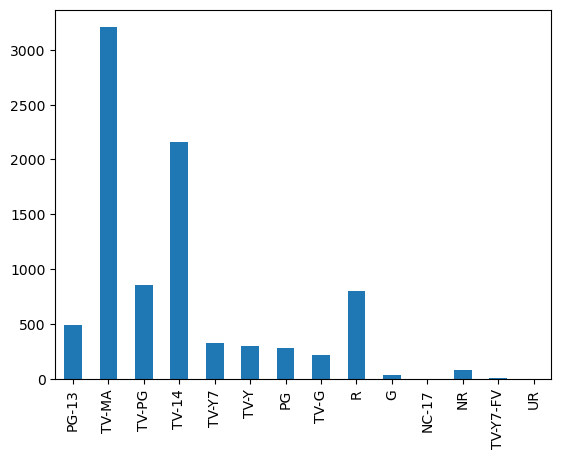

In [270]:
df['rating'].value_counts(sort=False).plot(kind='bar')

In [277]:
v=df['date_added'][0]

In [288]:
df['date_added']=pd.to_datetime(df['date_added'])

In [299]:
df['release_day']=df['date_added'].map(lambda x: x.day_name())

<AxesSubplot:xlabel='release_day'>

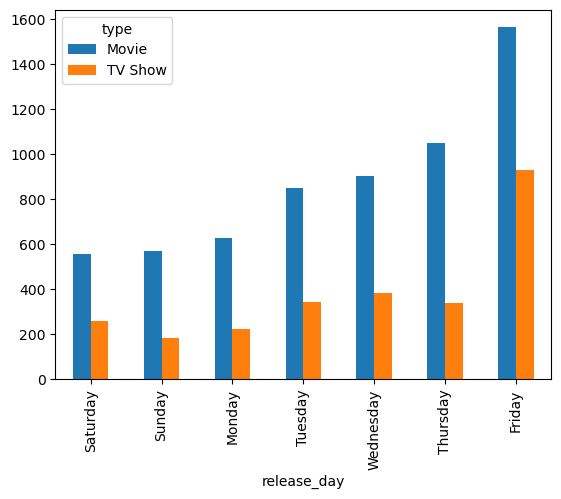

In [314]:
df.groupby(['release_day','type'])['type'].count().unstack().sort_values(by=['Movie','TV Show']).plot(kind='bar')

(array([1.000e+00, 8.000e+00, 7.000e+00, 2.100e+01, 2.700e+01, 9.900e+01,
        1.500e+02, 2.940e+02, 1.102e+03, 7.081e+03]),
 array([1925. , 1934.6, 1944.2, 1953.8, 1963.4, 1973. , 1982.6, 1992.2,
        2001.8, 2011.4, 2021. ]),
 <BarContainer object of 10 artists>)

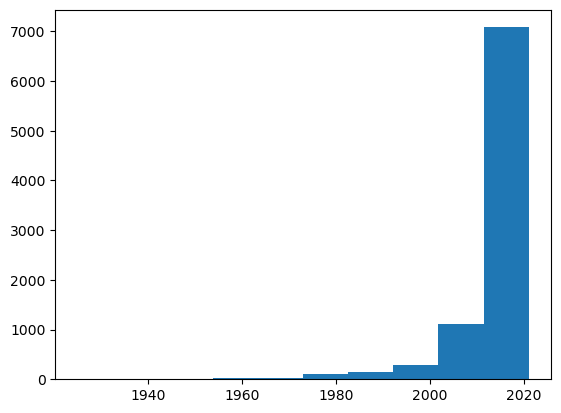

In [316]:
plt.hist(df['release_year'])

In [320]:
df['added_year']=df['date_added'].dt.year

<AxesSubplot:xlabel='added_year'>

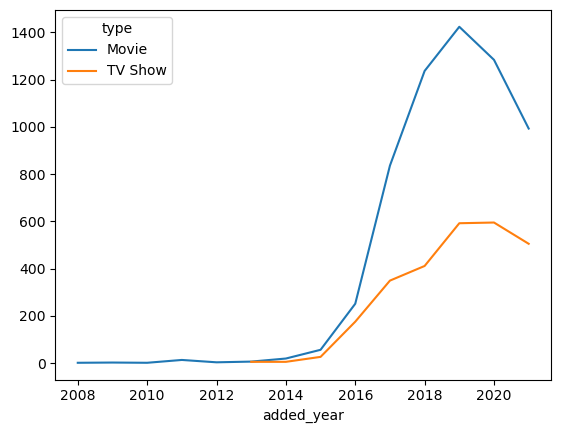

In [329]:
df.groupby(['added_year','type'])['type'].count().unstack().plot()

([<matplotlib.patches.Wedge at 0x2255566ab50>,
 [Text(0.4538657841287907, 1.0020009231518492, 'TV-MA'),
  Text(-1.096508083679294, 0.08757866421659208, 'TV-14'),
  Text(-0.5953060725183843, -0.9249922594393623, 'TV-PG'),
  Text(0.023586994787273424, -1.0997470862325143, 'R'),
  Text(0.510043740534689, -0.9746052445689911, 'PG-13'),
  Text(0.7706964059705037, -0.7848739069584035, 'TV-Y7'),
  Text(0.9283813813849703, -0.5900067886878375, 'TV-Y'),
  Text(1.0317210386597622, -0.38151238300587564, 'PG'),
  Text(1.0835830734960945, -0.18933494878853557, 'TV-G'),
  Text(1.0975963617136395, -0.07267892922285984, 'NR'),
  Text(1.099703182408055, -0.02555211540354897, 'G'),
  Text(1.099977237488112, -0.007076511006277335, 'TV-Y7-FV'),
  Text(1.099994309462126, -0.0035382412214002854, 'NC-17'),
  Text(1.099999367764114, -0.0011793720996392217, 'UR')],
 [Text(0.24756315497934034, 0.5465459580828268, '36.5'),
  Text(-0.5980953183705239, 0.04777018048177749, '24.5'),
  Text(-0.3247124031918459, -0.5

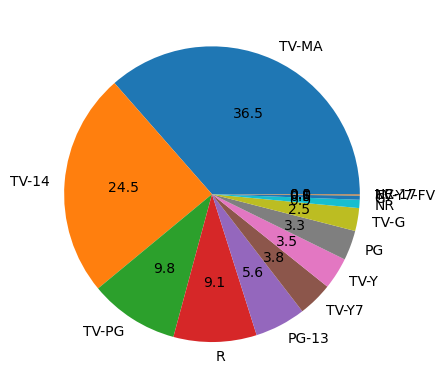

In [336]:
plt.pie(df['rating'].value_counts(),autopct='%0.1f',labels=df['rating'].value_counts().index)

In [386]:
x=df.groupby(['country'])['rating'].value_counts().unstack()

<AxesSubplot:xlabel='country'>

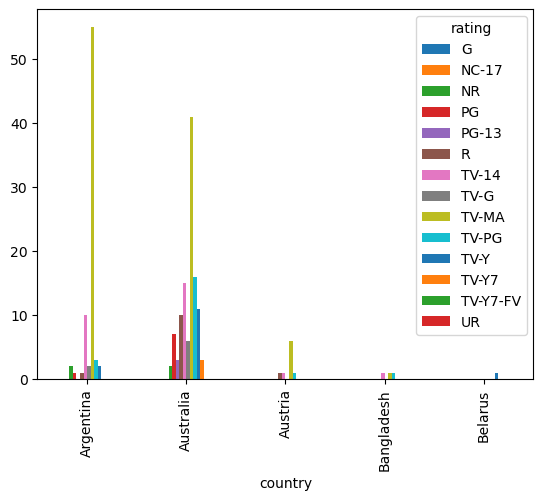

In [433]:
df.groupby(['country'])['rating'].value_counts().sort_values(ascending=False).unstack().head(5).plot(kind='bar')

In [434]:
df.pivot_table(index='country',columns='rating')

added_year                                             \
rating                G NC-17      NR           PG   PG-13       R   
country                                                              
Argentina           NaN   NaN  2017.0  2020.000000     NaN  2018.0   
Australia           NaN   NaN  2015.5  2019.142857  2020.0  2018.2   
Austria             NaN   NaN     NaN          NaN     NaN  2020.0   
Bangladesh          NaN   NaN     NaN          NaN     NaN     NaN   
Belarus             NaN   NaN     NaN          NaN     NaN     NaN   
...                 ...   ...     ...          ...     ...     ...   
Uruguay             NaN   NaN     NaN          NaN     NaN     NaN   
Venezuela           NaN   NaN  2018.0          NaN     NaN     NaN   
Vietnam             NaN   NaN     NaN          NaN     NaN     NaN   
West Germany        NaN   NaN     NaN          NaN     NaN     NaN   
Zimbabwe            NaN   NaN     NaN          NaN     NaN     NaN   

                                                                  ...  \
rating              TV-14         TV-G        TV-MA        TV-PG  ...   
country                                                           ...   
Argentina     2019.200000  2020.000000  2018.727273  2018.666667  ...   
Australia     2018.200000  2019.333333  2018.609756  2018.500000  ...   
Austria       2016.000000          NaN  2019.666667  2017.000000  ...   
Bangladesh    2019.000000          NaN  2019.000000  2021.000000  ...   
Belarus               NaN          NaN          NaN          NaN  ...   
...                   ...          ...          ...          ...  ...   
Uruguay               NaN  2020.000000  2019.200000  2020.500000  ...   
Venezuela     2017.000000          NaN          NaN          NaN  ...   
Vietnam       2018.666667  2020.000000  2019.333333          NaN  ...   
West Germany          NaN          NaN  2017.000000          NaN  ...   
Zimbabwe              NaN  2020.000000          NaN          NaN  ...   

             release_year                                                 \
rating              PG-13       R        TV-14         TV-G        TV-MA   
country                                                                    
Argentina             NaN  2006.0  2018.700000  2019.500000  2015.581818   
Australia     2006.666667  2009.2  2014.933333  2017.666667  2017.121951   
Austria               NaN  2017.0  2016.000000          NaN  2019.000000   
Bangladesh            NaN     NaN  2018.000000          NaN  2018.000000   
Belarus               NaN     NaN          NaN          NaN          NaN   
...                   ...     ...          ...          ...          ...   
Uruguay               NaN     NaN          NaN  2020.000000  2015.600000   
Venezuela             NaN     NaN  2017.000000          NaN          NaN   
Vietnam               NaN     NaN  2016.666667  2020.000000  2018.000000   
West Germany          NaN     NaN          NaN          NaN  1977.000000   
Zimbabwe              NaN     NaN          NaN  2017.000000          NaN   

                                                               
rating           TV-PG         TV-Y        TV-Y7 TV-Y7-FV  UR  
country                                                        
Argentina     2018.000  2016.000000          NaN      NaN NaN  
Australia     2015.625  2017.909091  2017.666667      NaN NaN  
Austria       2014.000          NaN          NaN      NaN NaN  
Bangladesh    2017.000          NaN          NaN      NaN NaN  
Belarus            NaN  2016.000000          NaN      NaN NaN  
...                ...          ...          ...      ...  ..  
Uruguay       2018.500          NaN          NaN      NaN NaN  
Venezuela          NaN          NaN          NaN      NaN NaN  
Vietnam            NaN          NaN          NaN      NaN NaN  
West Germany       NaN          NaN          NaN      NaN NaN  
Zimbabwe           NaN          NaN          NaN      NaN NaN  

[85 rows x 28 columns]